# Bayesian coin toss

Emulate any Bernoulli distribution via a coin toss with the Metropolis-Hasting algorithm


In [27]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
def generate_candidate(n = 1):
    return bernoulli.rvs(0.5, size = n)

def generate_acc_function(target_p):

    def accept_prob(current, candidate):
        
        current_l = target_p if bool(current) else (1 - target_p)
        candidate_l = target_p if bool(candidate) else (1 - target_p)
        
        prob = candidate_l / current_l
        
        
        return prob
    
    return accept_prob

In [24]:
def sample_mh(target_p, num = 1000, iterations = 100):
    compute_acceptance = generate_acc_function(target_p)
    samples = generate_candidate(num)
    tot_accept = 0
    
    mean = []
    std = []
    
    for i in range(iterations):
        for n in range(num):
            current = samples[n]
            candidate = generate_candidate()
            acc = compute_acceptance(current, candidate)
         
            unif = np.random.uniform()
            accept = unif < acc
            
            if accept:
                samples[n] = candidate
                tot_accept += 1
                
        mean.append(np.mean(samples))
        std.append(np.std(samples))
                    
    acceptance_rate = tot_accept / (n * iterations)
    
    
    return samples, mean, std, acceptance_rate

In [25]:
samples, mean, std, rate = sample_mh(0.9, num=5000, iterations=150)

print('Acceptance ratio: ', rate)

Acceptance ratio:  0.6022831232913249


In [31]:
df = pd.DataFrame()
df['mean'] = mean
df['std'] = std
df['iteration'] = range(1150)

In [32]:
df

,mean,std,iteration
0,0.7242,0.446917,0
1,0.8224,0.382176,1
2,0.8608,0.346155,2
3,0.8834,0.320943,3
4,0.8900,0.312890,4
5,0.8952,0.306296,5
6,0.8984,0.302122,6
7,0.8956,0.305779,7
8,0.8978,0.302911,8
9,0.9004,0.299466,9


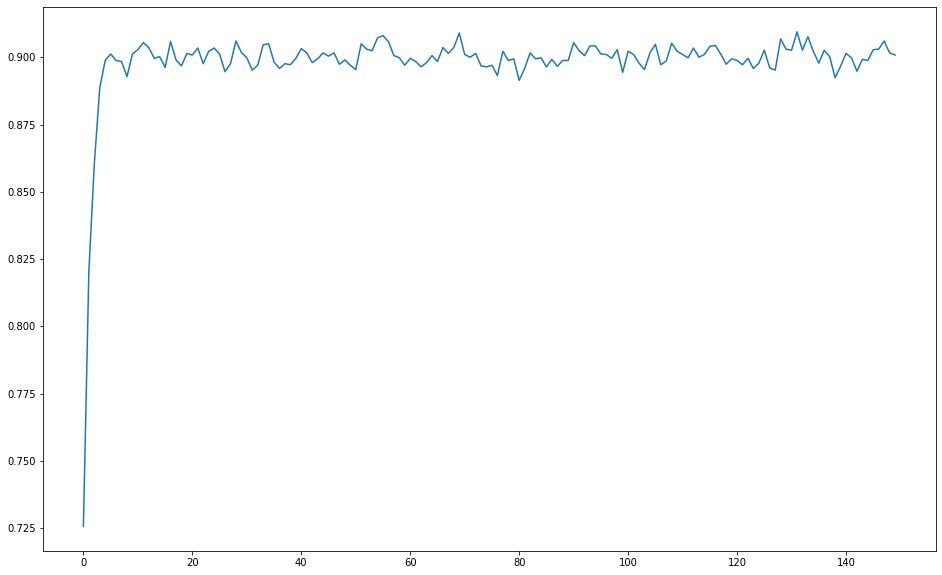

In [19]:
ax = sns.lineplot(x='mean', data=df)
ax.fill_between(df["rho"], y1=df["mean"] - df["std"], y2=df["mean"] + df["std"], alpha=.5)